In [1]:
import sys
sys.path.append('../')

In [2]:
import random
import pandas as pd
from asr.utils import ROOT_PATH

In [3]:

df_metadata = pd.read_csv(ROOT_PATH / "data" / "datasets" / "ljspeech"/ 'metadata.csv', sep='|', 
                                  header=None)


In [4]:
a = df_metadata.index.tolist()
random.Random(42).shuffle(a)
df_metadata.loc[a]

,0,1,2
10780,LJ041-0107,He testified that he had felt the sergeant had...,He testified that he had felt the sergeant had...
6186,LJ021-0146,I shall seek assurances of the making and main...,I shall seek assurances of the making and main...
6956,LJ026-0043,and hence so unfamiliar that to most people th...,and hence so unfamiliar that to most people th...
6674,LJ024-0080,Our difficulty with the Court today rises not ...,Our difficulty with the Court today rises not ...
8139,LJ030-0150,The Dallas police radio log reflects that Chie...,The Dallas police radio log reflects that Chie...
...,...,...,...
4506,LJ016-0093,"They asked him how he had cut his hand, which ...","They asked him how he had cut his hand, which ..."
12149,LJ047-0095,"On the next day, he asked the New Orleans poli...","On the next day, he asked the New Orleans poli..."
409,LJ002-0225,The rentals of rooms and fees went to the ward...,The rentals of rooms and fees went to the ward...
1824,LJ007-0099,were the ten persons committed to Newgate by t...,were the ten persons committed to Newgate by t...


# Parser

In [5]:
import json
from asr.utils.parse_config import ConfigParser

In [6]:
config_file_1 = open('../configs/quartznet_librispeech_config.json')
config_file_1 = json.load(config_file_1)
config_parser_1 = ConfigParser(config_file_1)

In [7]:
config_file_2 = open('../configs/quartznet_librispeech_datasphere_config.json')
config_file_2 = json.load(config_file_2)
config_parser_2 = ConfigParser(config_file_2)

In [8]:
config_parser_1.log_dir

PosixPath('saved/log/quartznet_librispeech_config/1025_032830')

In [9]:
config_parser.save_dir

PosixPath('saved/models/train_quartznet_librispeech_config/1025_032041')

# librispeech_dataset.py

In [9]:
from asr.datasets.utils import get_dataloaders
from asr.text_encoder.text_encoder import TextEncoder
from asr.text_encoder.text_encoder import get_simple_alphabet
from asr.augmentations import from_configs

In [10]:
text_encoder = TextEncoder(get_simple_alphabet())

In [12]:
dataloaders = get_dataloaders(configs=config_parser, text_encoder=text_encoder)

61 (2.3%) records are longer then 20.0 seconds. Excluding them.
292 (10.8%) records are longer then200 characters. Excluding them.
Filtered 292(10.8%) records  from dataset


In [13]:
dataloader_train = dataloaders['train']

In [14]:
for batch in dataloader_train:
    break

In [14]:
batch["spectrogram"]

tensor([[[2.3355e-05, 6.7921e-05, 5.7195e-04,  ..., 2.9250e-09,
          2.4689e-09, 3.8401e-09],
         [1.0100e-03, 2.9372e-03, 7.2418e-04,  ..., 1.2781e-08,
          1.0486e-09, 3.2709e-10],
         [3.3012e-04, 9.6005e-04, 8.3883e-04,  ..., 1.0246e-08,
          1.0263e-09, 4.1677e-10],
         ...,
         [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
          0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
          0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
          0.0000e+00, 0.0000e+00]],

        [[3.0429e-02, 8.8493e-02, 2.4450e-03,  ..., 1.2027e-05,
          1.0165e-05, 6.6943e-06],
         [6.0377e-02, 1.7559e-01, 6.9622e-02,  ..., 1.1353e-06,
          2.4025e-07, 5.2338e-07],
         [2.0611e-01, 5.9941e-01, 1.6638e-01,  ..., 8.4158e-07,
          3.1869e-07, 4.7036e-07],
         ...,
         [1.1875e-01, 3.4535e-01, 1.9677e-01,  ..., 1.6282e-04,
          1.512

In [9]:
from asr.logger.utils import plot_spectrogram
import matplotlib.pyplot as plt

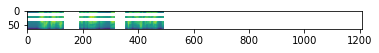

In [18]:
plt.imshow(batch['spectrogram'][3].log().permute(1, 0))

In [15]:
batch

{'audio': [tensor([[0.0024, 0.0020, 0.0011,  ..., 0.0039, 0.0036, 0.0023]]),
  tensor([[0.0030, 0.0034, 0.0030,  ..., 0.0023, 0.0022, 0.0004]]),
  tensor([[ 3.3703e-03,  6.1467e-03,  4.5121e-03,  ...,  1.6496e-05,
           -1.0747e-03, -1.8082e-03]]),
  tensor([[0.0057, 0.0062, 0.0054,  ..., 0.0028, 0.0021, 0.0009]]),
  tensor([[0.0016, 0.0024, 0.0028,  ..., 0.0038, 0.0046, 0.0031]]),
  tensor([[-0.0010, -0.0008, -0.0003,  ..., -0.0011, -0.0012, -0.0006]]),
  tensor([[-0.0358, -0.0389, -0.0341,  ..., -0.0368, -0.0365, -0.0120]]),
  tensor([[0.0007, 0.0008, 0.0006,  ..., 0.0000, 0.0000, 0.0000]]),
  tensor([[-6.5386e-05, -1.3814e-03, -2.3069e-03,  ..., -8.9228e-04,
            3.4048e-04,  3.0951e-04]]),
  tensor([[-1.0015e-03, -1.1310e-03, -1.1547e-03,  ..., -5.4502e-05,
           -2.1051e-04, -4.5887e-05]]),
  tensor([[ 0.0005,  0.0006, -0.0002,  ...,  0.0010,  0.0017,  0.0014]]),
  tensor([[ 0.0004,  0.0027,  0.0037,  ..., -0.0020, -0.0020, -0.0005]]),
  tensor([[2.9216e-28, 2.921

In [16]:
batch["audio"]


[tensor([[9.1553e-05, 1.3428e-03, 3.0518e-04,  ..., 5.1270e-03, 8.7280e-03,
          9.7656e-04]]),
 tensor([[-0.0005, -0.0002, -0.0002,  ...,  0.0023,  0.0020,  0.0016]]),
 tensor([[0.0016, 0.0026, 0.0026,  ..., 0.0033, 0.0040, 0.0041]]),
 tensor([[-9.1553e-05, -1.8311e-04, -1.2207e-04,  ..., -2.4414e-04,
          -9.1553e-05,  3.0518e-05]]),
 tensor([[-0.0067,  0.0083,  0.0089,  ..., -0.0004, -0.0003, -0.0002]]),
 tensor([[ 1.5259e-04,  3.9673e-04,  6.1035e-05,  ..., -2.7466e-04,
          -3.6316e-03, -5.1270e-03]]),
 tensor([[ 0.0027, -0.0027, -0.0039,  ..., -0.0117,  0.0049,  0.0090]]),
 tensor([[0.0031, 0.0032, 0.0033,  ..., 0.0007, 0.0017, 0.0024]]),
 tensor([[ 3.3569e-03,  6.1035e-03,  1.9226e-03,  ..., -8.6670e-03,
           6.1035e-05, -1.9836e-03]]),
 tensor([[-0.0009, -0.0116, -0.0166,  ..., -0.0016, -0.0014, -0.0017]]),
 tensor([[ 2.4414e-04,  1.8311e-04,  9.1553e-05,  ..., -7.6294e-04,
          -7.3242e-04, -6.7139e-04]]),
 tensor([[ 0.0103,  0.0090,  0.0036,  ..., -0

In [11]:
from IPython import display
import torch
import matplotlib.pyplot as plt

In [12]:
def visualize_audio(wav: torch.Tensor, sr: int = 22050):
    # Average all channels
    if wav.dim() == 2:
        # Any to mono audio convertion
        wav = wav.mean(dim=0)
    
    plt.figure(figsize=(16, 5))
    plt.plot(wav, alpha=.7, c='green')
    plt.grid()
    plt.xlabel('Time', size=16)
    plt.ylabel('Amplitude', size=16)
    plt.show()
    
    display.display(display.Audio(wav, rate=sr)) # normalize=False

In [14]:
visualize_audio(batch["audio"][1])

NameError: name 'batch' is not defined

In [14]:
display.display(display.Audio(batch["audio"][4], rate=1600))

NameError: name 'batch' is not defined

tensor([-0.0513,  0.0086,  0.0435,  ..., -0.0114, -0.0438,  0.0000])

In [33]:
display.display(display.Audio(batch["audio"][4].squeeze(), rate=20000))

In [13]:
from operator import xor

from torch.utils.data import DataLoader, ConcatDataset

import asr.augmentations
import asr.batch_sampler as batch_sampler_module
import asr.datasets
from asr.text_encoder.text_encoder import TextEncoder
from asr.collate_fn.collate import collate_fn
from asr.utils.parse_config import ConfigParser

In [14]:
for split, params in config_parser_1["data"].items():
    break

In [28]:
params

{'batch_size': 32,
 'num_workers': 5,
 'datasets': [{'type': 'LibrispeechDataset',
   'args': {'part': 'train-clean-500'}}]}

In [29]:
config_parser_1['augmentations']

{'wave': [{'type': 'GaussianNoiseAugmentation', 'args': {'std': 0.025}},
  {'type': 'TimeStretchingAugmentation', 'args': {'stretch': 'random'}},
  {'type': 'PitchShiftingAugmentation',
   'args': {'sample_rate': 22050, 'n_steps': 'random'}},
  {'type': 'VolumeAugmentation', 'args': {'gain': 'random'}}],
 'spectrogram': [{'type': 'SpectAugmentation',
   'args': {'n_freq_masks': 2, 'n_time_masks': 2}}]}

In [15]:
wave_augs, spec_augs = asr.augmentations.from_configs(config_parser_1)
drop_last = True

In [16]:
spec_augs

In [17]:
wave_augs

In [23]:
config_parser_1["data"]

{'train': {'batch_size': 32,
  'num_workers': 5,
  'datasets': [{'type': 'LibrispeechDataset',
    'args': {'part': 'train-clean-500'}}]},
 'val': {'batch_size': 32,
  'num_workers': 5,
  'datasets': [{'type': 'LibrispeechDataset', 'args': {'part': 'dev-clean'}}]},
 'test': {'batch_size': 32,
  'num_workers': 5,
  'datasets': [{'type': 'LibrispeechDataset',
    'args': {'part': 'test-clean'}}]}}

In [19]:
datasets = []
for ds in params["datasets"]:
    datasets.append(config_parser_1.init_obj(ds, asr.datasets, 
                                           text_encoder=text_encoder, config_parser=config_parser_1,
                                           wave_augs=wave_augs, spec_augs=spec_augs))

AssertionError: 

In [28]:
datasets

In [29]:
assert len(datasets)

if len(datasets) > 1:
    dataset = ConcatDataset(datasets)
else:
    dataset = datasets[0]

In [30]:
dataset.index

[{'path': '/Users/khaykingleb/Desktop/QuartzNet/data/datasets/librispeech/dev-clean/3081/166546/3081-166546-0073.flac',
  'text': 'yes',
  'audio_len': 1.445},
 {'path': '/Users/khaykingleb/Desktop/QuartzNet/data/datasets/librispeech/dev-clean/777/126732/777-126732-0081.flac',
  'text': 'comfortable dear',
  'audio_len': 1.505},
 {'path': '/Users/khaykingleb/Desktop/QuartzNet/data/datasets/librispeech/dev-clean/251/136532/251-136532-0022.flac',
  'text': 'lectures',
  'audio_len': 1.535},
 {'path': '/Users/khaykingleb/Desktop/QuartzNet/data/datasets/librispeech/dev-clean/2035/147960/2035-147960-0015.flac',
  'text': 'otto winked at me',
  'audio_len': 1.56},
 {'path': '/Users/khaykingleb/Desktop/QuartzNet/data/datasets/librispeech/dev-clean/1272/141231/1272-141231-0013.flac',
  'text': 'the twenties',
  'audio_len': 1.6399375},
 {'path': '/Users/khaykingleb/Desktop/QuartzNet/data/datasets/librispeech/dev-clean/5694/64025/5694-64025-0000.flac',
  'text': 'shiloh',
  'audio_len': 1.67},


In [31]:
if "batch_size" in params:
    bs = params["batch_size"]
    shuffle = True
    batch_sampler = None

In [32]:
dataset.index[0]

{'path': '/Users/khaykingleb/Desktop/QuartzNet/data/datasets/librispeech/dev-clean/3081/166546/3081-166546-0073.flac',
 'text': 'yes',
 'audio_len': 1.445}

In [33]:
import matplotlib.pyplot as plt

In [35]:
dataset[2000]['spectrogram']

AttributeError: 'LibrispeechDataset' object has no attribute 'config'

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/image.py:446: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/image.py:453: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/image.py:458: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)


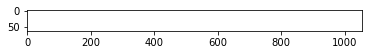

In [23]:
plt.imshow(dataset[2000]['spectrogram'].log().squeeze())

In [44]:
data_dict = dataset.index[0]
audio_path = '/Users/khaykingleb/Desktop/QuartzNet/data/datasets/ljspeech/wavs/LJ001-0001.wav' #data_dict["path"]

#audio_wave, audio_spec = self.process_wave(audio_wave)


In [45]:
audio_path

'/Users/khaykingleb/Desktop/QuartzNet/data/datasets/ljspeech/wavs/LJ001-0001.wav'

In [46]:
import torchaudio
import torch

In [47]:
def load_audio(path):
        audio_tensor, sr = torchaudio.load(path)
        audio_tensor = audio_tensor[0:1, :]  # remove all channels but the first
        target_sr = 16000
        if sr != target_sr:
            audio_tensor = torchaudio.functional.resample(audio_tensor, sr, target_sr)
        return audio_tensor

In [48]:
audio_wave = load_audio(audio_path)

In [49]:
audio_wave

tensor([[-6.5252e-04, -7.3032e-04, -7.0805e-04,  ...,  6.9223e-04,
          1.3324e-04,  1.4660e-05]])

In [67]:
def process_wave(audio_tensor_wave):
    with torch.no_grad():

            if wave_augs is not None:
                audio_tensor_wave = wave_augs(audio_tensor_wave)

            wave2spec = config_parser.init_obj(config_parser["preprocessing"]["spectrogram"],
                                                    torchaudio.transforms)
            
            audio_tensor_spec = wave2spec(audio_tensor_wave)

            if spec_augs is not None:
                audio_tensor_spec = spec_augs(audio_tensor_spec)

            return audio_tensor_wave, audio_tensor_spec

In [71]:
audio_wave, audio_spec = process_wave(audio_wave)

hi
hi


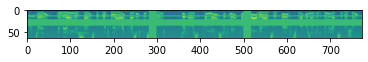

In [76]:
plt.imshow(audio_spec.log())

In [61]:
a = torchaudio.transforms.MelSpectrogram()

/opt/anaconda3/lib/python3.8/site-packages/torchaudio/functional/functional.py:432: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


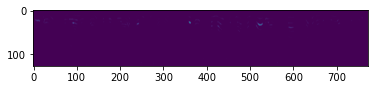

In [62]:
plt.imshow(a(audio_wave).squeeze())

In [4]:
from asr.utils import ROOT_PATH

In [ ]:
try:
    data_dir = ROOT_PATH / "data" / "datasets" / "ljspeech"
    data_dir.mkdir(exist_ok=True, parents=True)

except Exception:
    print('Directory is already created.')

In [6]:
part = "train"
index_path = data_dir / f"{part}_index.json"

In [9]:
index = []

In [10]:
URL = "https://data.keithito.com/data/speech/LJSpeech-1.1.tar.bz2"

In [12]:
import json
import logging
import os
import shutil
from speechbrain.utils.data_utils import download_file

In [13]:
arch_path = data_dir / "LJSpeech-1.1.tar.bz2"

print(f"Loading LJSpeech-1.1")
download_file(URL, arch_path)

Loading LJSpeech-1.1


LJSpeech-1.1.tar.bz2: 2.75GB [30:04, 1.52MB/s]                            


In [14]:
shutil.unpack_archive(arch_path, data_dir)

OSError: [Errno 28] No space left on device

In [ ]:
for fpath in (data_dir / "LJSpeech-1.1").iterdir():
            shutil.move(str(fpath), str(data_dir / fpath.name))

In [ ]:
os.remove(str(arch_path))

In [ ]:
shutil.rmtree(str(data_dir / "LJSpeech-1.1")